In [113]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import datetime

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [114]:
df = pd.read_csv('kc_house_data_train.csv')
df.rename(columns = {'Unnamed: 0': 'index'}, inplace = True)
df.set_index('index', inplace = True)

def new_string(number):
    
    new_string = df.date[number].replace("T000000",'')
    
    new_string =  new_string[:4] + "-" + new_string[4:]
    
    new_string =  new_string[:7] + "-" + new_string[7:]
    
    return new_string

def into_time(string):
    return datetime.datetime.strptime(string, "%Y-%m-%d")

df['sold_time'] = [into_time(i) for i in [new_string(i) for i in range(len(df))]]
df['years_ago_sold'] = abs(pd.DatetimeIndex(df['sold_time']).year - 2021)


In [115]:
df['years_ago_built'] = abs(df['yr_built'] - 2021)
df['years_ago_built']

yr_renovated_minus_yr_built = []

for i in range(len(df)): 

    if df.yr_renovated[i] == 0:
        yr_renovated_minus_yr_built.append(0)
    else:
        yr_renovated_minus_yr_built.append(df.yr_renovated[i] - df.yr_built[i])

df["renovated_after"] = yr_renovated_minus_yr_built

In [116]:
target = df.price
df_features = df.drop(['price'], axis = 1)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9,test_size=0.2)

<AxesSubplot:>

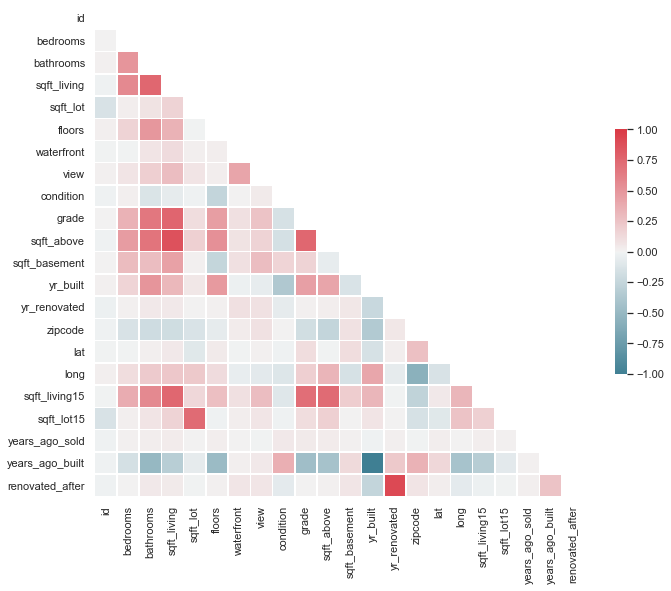

In [118]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [103]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,years_ago_sold,years_ago_built,renovated_after
bedrooms,NaN,0.505725,0.564273,0.028925,0.170683,0.007119,0.074653,0.021194,0.348896,0.467916,0.296581,0.382051,0.018382,0.009839,0.156701,0.007088
bathrooms,NaN,NaN,0.754353,0.078504,0.492800,0.072574,0.188267,0.123807,0.664316,0.684122,0.288169,0.565778,0.074053,0.029061,0.507678,0.047676
sqft_living,NaN,NaN,NaN,0.168833,0.351500,0.121827,0.285025,0.062317,0.760049,0.874431,0.442037,0.751843,0.170894,0.035009,0.316571,0.039579
sqft_lot,NaN,NaN,NaN,NaN,0.004269,0.016966,0.077697,0.010798,0.116790,0.181008,0.012922,0.148123,0.730340,0.005846,0.054997,0.005306
floors,NaN,NaN,NaN,NaN,NaN,0.026498,0.025216,0.257399,0.456882,0.526344,0.249500,0.277224,0.010396,0.026687,0.481202,0.015266
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,0.418471,0.006766,0.096860,0.083276,0.096845,0.098347,0.024004,0.005617,0.020006,0.064645
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040953,0.251795,0.164209,0.283196,0.283037,0.069932,0.000369,0.046915,0.069980
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145388,0.157424,0.162766,0.093753,0.011136,0.047721,0.363959,0.062925
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.755676,0.167599,0.713230,0.114429,0.039833,0.448011,0.007512
sqft_above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048646,0.728536,0.186486,0.033405,0.420815,0.010160


In [119]:
to_drop2 = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop2

['sqft_above']

In [120]:
df.drop(to_drop2, axis = 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_time,years_ago_sold,years_ago_built,renovated_after
index,,,,,,,,,,,,,,,,,,,,,,,,
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,0,1986,0,98058,47.4388,-122.162,2390,7700,2014-10-06,7,35,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014-08-21,7,44,0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,0,1997,0,98006,47.5646,-122.129,3710,9685,2014-08-15,7,24,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,0,1990,0,98034,47.6995,-122.228,4050,14226,2015-03-31,6,31,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,0,2004,0,98052,47.6647,-122.083,2250,4050,2014-07-14,7,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,1220,1958,0,98008,47.5858,-122.112,2730,10400,2015-03-03,6,63,0
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,0,1948,0,98105,47.6687,-122.288,1350,4013,2014-05-20,7,73,0
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,0,1953,0,98028,47.7635,-122.262,1760,9403,2014-05-14,7,68,0
